#### Повторение кода из лекций курса https://stepik.org/course/4852 и решение задач

## 1. Введение

In [10]:
import pandas as pd
import numpy as np

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/titanic.csv')

In [3]:
df.shape

(891, 12)

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
df.dtypes.value_counts()

int64      5
object     5
float64    2
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df[(df.Pclass > 1) & (df.Survived == 0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [18]:
df2 = pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv')
df2.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [25]:
a = df2[df2.lunch == 'free/reduced'].shape[0]
ans = a / df2.shape[0]
ans

0.355

In [28]:
(df2.lunch == 'free/reduced').mean()

0.355

In [29]:
df2.lunch.unique()

array(['standard', 'free/reduced'], dtype=object)

<Axes: >

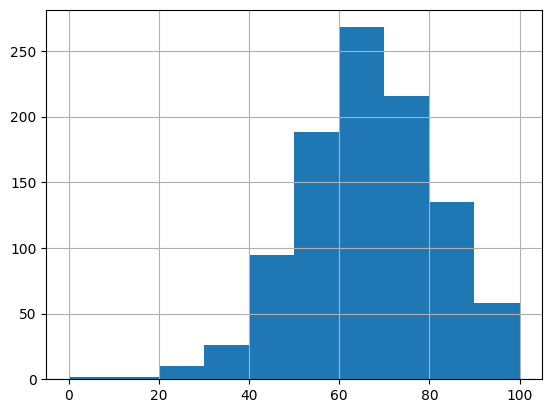

In [97]:
df2['math score'].hist()

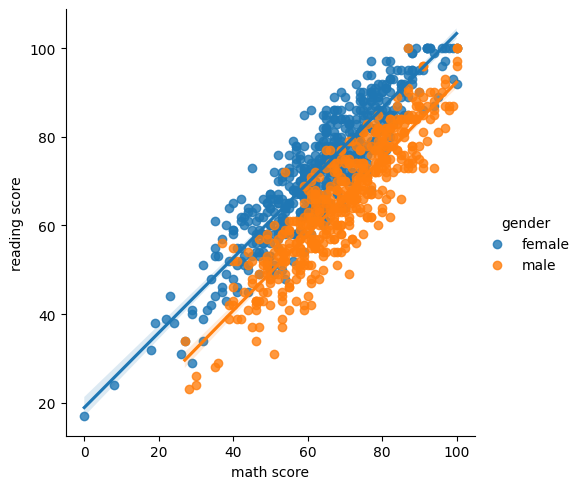

In [98]:
sns.lmplot(x='math score', y='reading score', hue='gender', data=df2)

In [46]:
df2.loc[df2.lunch == 'standard'].describe()

,math score,reading score,writing score
count,645.000000,645.000000,645.000000
mean,70.034109,71.654264,70.823256
std,13.653501,13.830602,14.339487
min,19.000000,26.000000,22.000000
25%,61.000000,63.000000,62.000000
50%,69.000000,72.000000,72.000000
75%,80.000000,82.000000,81.000000
max,100.000000,100.000000,100.000000


In [48]:
df2.loc[df2.lunch == 'free/reduced'].describe()

,math score,reading score,writing score
count,355.000000,355.000000,355.000000
mean,58.921127,64.653521,63.022535
std,15.159956,14.895339,15.433823
min,0.000000,17.000000,10.000000
25%,49.000000,56.000000,53.000000
50%,60.000000,65.000000,64.000000
75%,69.000000,75.000000,74.000000
max,100.000000,100.000000,100.000000


In [49]:
df_dota = pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv')
df_dota.head()

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [51]:
df_dota.groupby('legs').count()

,Unnamed: 0,attack_type,id,localized_name,name,primary_attr,roles
legs,,,,,,,
0,11,11,11,11,11,11,11
2,95,95,95,95,95,95,95
4,7,7,7,7,7,7,7
6,3,3,3,3,3,3,3
8,1,1,1,1,1,1,1


In [52]:
df_dota['legs'].value_counts()

2    95
0    11
4     7
6     3
8     1
Name: legs, dtype: int64

In [54]:
df_dota.groupby('legs').size()

legs
0    11
2    95
4     7
6     3
8     1
dtype: int64

In [62]:
df_dota.groupby(['attack_type', 'primary_attr']).describe()

Unnamed: 0                                           \
                              count       mean        std   min    25%   50%   
attack_type primary_attr                                                       
Melee       agi                19.0  61.315789  38.233279   0.0  34.50  65.0   
            int                 2.0  67.500000  20.506097  53.0  60.25  67.5   
            str                35.0  62.657143  34.265351   1.0  31.50  69.0   
Ranged      agi                18.0  46.111111  32.737618   5.0  15.25  44.5   
            int                40.0  55.225000  32.472069   2.0  28.75  50.5   
            str                 3.0  84.666667  25.774665  57.0  73.00  89.0   

                                          id             ...                 \
                            75%    max count       mean  ...     75%    max   
attack_type primary_attr                                 ...                  
Melee       agi           89.00  114.0  19.0  63.315789  ...   91.00  120.0   
            int           74.75   82.0   2.0  69.500000  ...   76.75   84.0   
            str           95.50  116.0  35.0  64.771429  ...   97.50  129.0   
Ranged      agi           67.75  111.0  18.0  47.777778  ...   69.75  113.0   
            int           78.75  115.0  40.0  57.275000  ...   80.75  121.0   
            str           98.50  108.0   3.0  86.666667  ...  100.50  110.0   

                          legs                                               
                         count      mean       std  min  25%  50%  75%  max  
attack_type primary_attr                                                     
Melee       agi           19.0  2.315789  1.796683  0.0  2.0  2.0  2.0  8.0  
            int            2.0  2.000000  0.000000  2.0  2.0  2.0  2.0  2.0  
            str           35.0  2.171429  0.890661  0.0  2.0  2.0  2.0  6.0  
Ranged      agi           18.0  1.444444  1.149026  0.0  0.0  2.0  2.0  4.0  
            int           40.0  2.250000  0.926809  0.0  2.0  2.0  2.0  6.0  
            str            3.0  1.333333  1.154701  0.0  1.0  2.0  2.0  2.0  

[6 rows x 24 columns]

In [55]:
df_salary = pd.read_csv('https://stepik.org/media/attachments/course/4852/accountancy.csv')
df_salary.head()

,Unnamed: 0,Executor,Type,Salary
0,0,Pupa,D,63
1,1,Pupa,A,158
2,2,Pupa,D,194
3,3,Pupa,E,109
4,4,Loopa,E,184


In [59]:
df_salary.groupby(['Type', 'Executor']).aggregate({'Salary': 'mean'})

Salary
Type Executor            
A    Loopa      58.000000
     Pupa      160.833333
B    Loopa     145.166667
     Pupa       77.000000
C    Loopa     154.333333
     Pupa       74.500000
D    Loopa     137.714286
     Pupa      146.500000
E    Loopa     164.000000
     Pupa      131.200000
F    Loopa     238.000000
     Pupa      136.250000

In [64]:
concentrations = pd.read_csv('http://stepik.org/media/attachments/course/4852/algae.csv')
concentrations.head()

,species,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
0,Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
1,Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
2,Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
3,Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203
4,Cladophora_fracta,Cladophora,green,3.861470,1.648450,6.940588,2.316955,2.528886


In [95]:
concentrations.groupby('group')['sucrose'].max() - concentrations.groupby('group')['sucrose'].min() 

group
brown    5.189345
green    3.259662
red      0.000000
Name: sucrose, dtype: float64

In [92]:
scope

group
brown    5.189345
green    3.259662
red      0.000000
Name: sucrose, dtype: float64

In [99]:
salary = pd.read_csv('https://stepik.org/media/attachments/course/4852/income.csv')
salary.head()

,income
2018-11-30,20
2018-12-31,60
2019-01-31,180
2019-02-28,380
2019-03-31,660


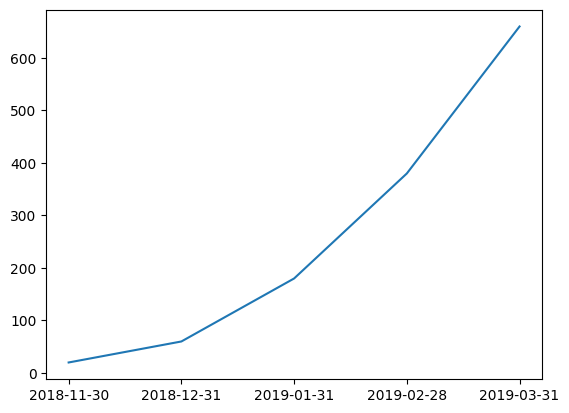

In [110]:
plt.plot(salary.index, salary.income)

C:\Users\KDK\AppData\Local\Temp\ipykernel_1940\2111926114.py:1: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.scatterplot(x=salary.index,y=salary.income,hue='income',palette=sns.color_palette("hls",10),data=salary,


<Axes: ylabel='income'>

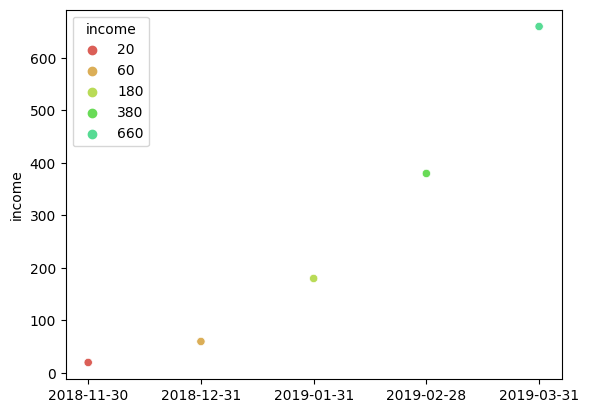

In [114]:
sns.scatterplot(x=salary.index,y=salary.income,hue='income',palette=sns.color_palette("hls",10),data=salary,
               legend="full")

In [115]:
salary

,income
2018-11-30,20
2018-12-31,60
2019-01-31,180
2019-02-28,380
2019-03-31,660


##### Задача 1.
<br>Вам дан датасэт с 2-мя фичами (колонками). Постройте график распределения точек (наблюдений) в пространстве этих 2-ух переменных (одна из них будет x, а другая - y) и напишите число кластеров, формируемых наблюдениями

In [123]:
df123 = pd.read_csv(r'C:\Users\KDK\DS_education\dataset_209770_6 (1).txt', sep=' ')
df123.head()

,x,y
0,504.076298,195.530355
1,1508.447735,286.050917
2,1094.389724,580.122593
3,1203.838418,684.653974
4,507.837220,191.916221


<Axes: xlabel='x', ylabel='y'>

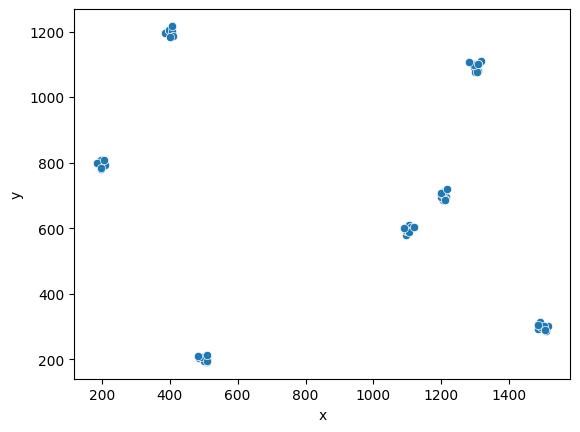

In [124]:
sns.scatterplot(x='x',y='y',data=df123)

Ответ: 7 кластеров

##### Задача 2. 

Скачайте данные, представляющие геномные расстояния между видами, и постройте тепловую карту, чтобы различия было видно наглядно. В ответ впишите, какая картинка соответствует скачанным данным

In [130]:
genom = pd.read_csv('https://stepik.org/media/attachments/course/4852/genome_matrix.csv', index_col=0)
genom.head()


,species0,species1,species2,species3,species4
species0,0.536029,0.920292,0.679708,0.840606,0.430842
species1,0.920292,0.862417,0.887593,0.769754,0.203214
species2,0.679708,0.887593,0.595156,0.003435,0.096052
species3,0.840606,0.769754,0.003435,0.458870,0.029251
species4,0.430842,0.203214,0.096052,0.029251,0.642109


In [129]:
genom.dtypes

Unnamed: 0     object
species0      float64
species1      float64
species2      float64
species3      float64
species4      float64
dtype: object

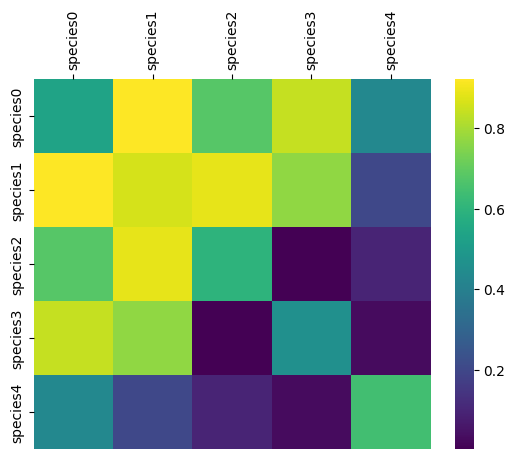

In [131]:
g = sns.heatmap(genom, cmap="viridis")
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)

##### Задача 3. 

Пришло время узнать, кто самый главный рак какая роль в dota самая распространённая. Скачайте датасэт с данными о героях из игры dota 2 и посмотрите на распределение их возможных ролей в игре (колонка roles). Постройте гистограмму, отражающую скольким героям сколько ролей приписывается (по мнению Valve, конечно) и напишите какое число ролей у большинства героев.

In [133]:
df_dota2 = pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv', index_col=0)
df_dota2.head()

,attack_type,id,legs,localized_name,name,primary_attr,roles
0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [145]:
df_dota2['len_roles'] = df_dota2.aggregate({'roles': lambda x: len(x.split(','))})
df_dota2.head()

,attack_type,id,legs,localized_name,name,primary_attr,roles,len_roles
0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']",3
1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']",4
2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']",4
3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini...",5
4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']",4


In [150]:
df_dota2['len_roles'].value_counts().sort_values(ascending=False)

4    38
5    33
3    28
2     9
6     8
1     1
Name: len_roles, dtype: int64

Ответ: 4 роли

In [153]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: ylabel='Density'>

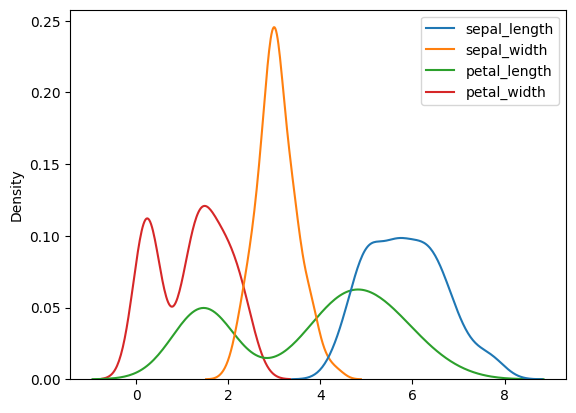

In [155]:
sns.kdeplot(data=iris)

<Axes: ylabel='petal_length'>

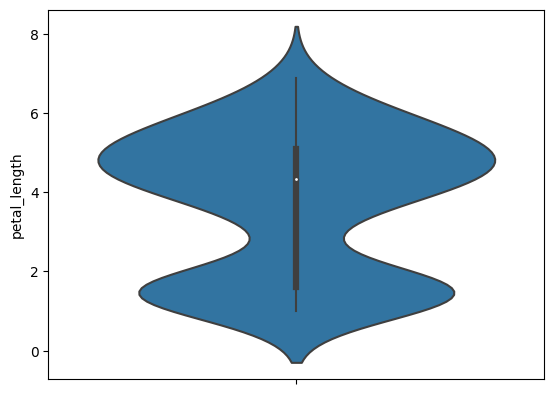

In [158]:
sns.violinplot(y=iris["petal_length"])

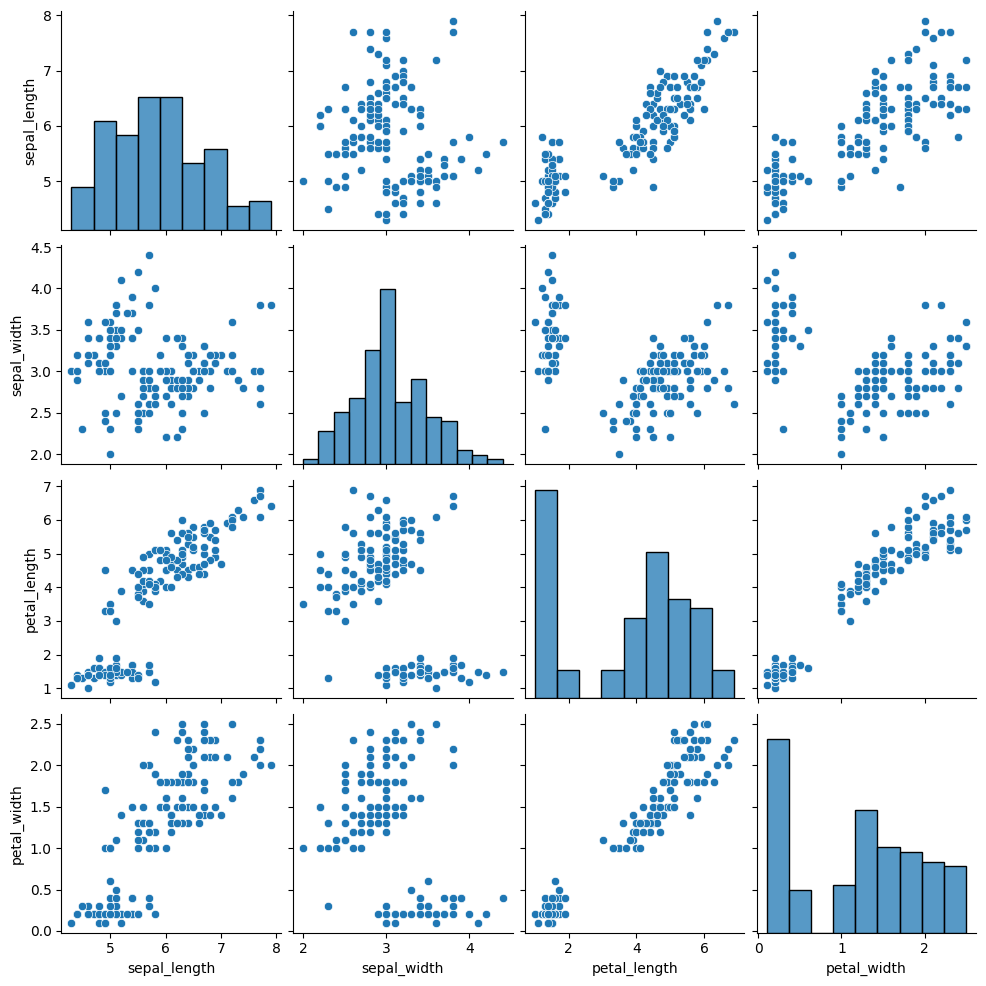

In [159]:
sns.pairplot(iris)

Любым удобным для вас способом создайте dataframe c именем my_data, в котором две колонки c именами (type - строки, value - целые числа) и четыре наблюдения в каждой колонке:


    type value
    A    10

    A    14

    B    12

    B    23

In [161]:
my_data = pd.DataFrame({'type': ['A', 'A', 'B', 'B'], 'value': [10, 14, 12, 7]})
my_data

,type,value
0,A,10
1,A,14
2,B,12
3,B,7


В dataframe с именем my_stat сохранено 20 строк и четыре колонки (V1, V2, V3, V4):

В переменную с именем subset_1 сохраните только первые 10 строк и только 1 и 3 колонку.
В переменную с именем subset_2 сохраните все строки кроме 1 и 5 и только 2 и 4 колонку.

In [164]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')
subset_1 = my_stat.iloc[:10, [0, 2]]
subset_1

,V1,V3
0,2,B
1,-1,B
2,0,A
3,2,A
4,0,B
5,2,A
6,0,A
7,1,A
8,0,B
9,-1,A


In [173]:
subset_2 = my_stat.drop([1, 5]).iloc[:, [1, 3]]
subset_2

,V2,V4
0,13.0,1.0
2,11.0,0.0
3,11.0,2.0
4,10.0,-1.0
6,9.0,2.0
...,...,...
495,8.0,-1.0
496,8.0,1.0
497,11.0,2.0
498,11.0,2.0


In [174]:
subset_1 = my_stat.iloc[:10, [0, 2]]
temp = my_stat.drop([1, 5])
subset_2 = temp.iloc[:, [1, 3]]

In [175]:
subset_2

,V2,V4
0,13.0,1.0
2,11.0,0.0
3,11.0,2.0
4,10.0,-1.0
6,9.0,2.0
...,...,...
495,8.0,-1.0
496,8.0,1.0
497,11.0,2.0
498,11.0,2.0


In [176]:
my_stat.head()

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
4,0,10.0,B,-1.0


В переменную subset_3 сохраните только те наблюдения, у которых значения переменной V1  строго больше 0, и значение переменной V3  равняется 'A'.

В переменную  subset_4  сохраните только те наблюдения, у которых значения переменной V2  не равняются 10, или значения переменной V4 больше или равно 1.

In [177]:
subset_3 = my_stat[(my_stat['V1'] > 0) & (my_stat['V3'] == 'A')]
subset_4 = my_stat[(my_stat['V2'] != 10) | (my_stat['V4'] >= 1)]
subset_3

,V1,V2,V3,V4
3,2,11.0,A,2.0
5,2,11.0,A,0.0
7,1,9.0,A,1.0
10,1,10.0,A,1.0
13,1,12.0,A,3.0
...,...,...,...,...
491,4,7.0,A,2.0
494,1,11.0,A,1.0
495,1,8.0,A,-1.0
496,3,8.0,A,1.0


In [178]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat_1.csv')
df.head()

,session_value,time,group,n_users
0,0.0,12,B,9
1,NaN,11,A,-1
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9


In [179]:
df['session_value'].fillna(value=0, inplace=True)
df.head()

,session_value,time,group,n_users
0,0.0,12,B,9
1,0.0,11,A,-1
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9


In [183]:
df.loc(df['n_users'] < 0)['n_users'] = df['n_users'].median()
df.head()

TypeError: unhashable type: 'Series'

В dataframe с именем my_stat сохранены данные с 4 колонками: session_value, group, time, n_users.  

В переменной session_value замените все пропущенные значения на нули.

В переменной n_users замените все отрицательные значения на медианное значение переменной n_users (без учета отрицательных значений, разумеется).

In [7]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat_1.csv')
my_stat.head()

,session_value,time,group,n_users
0,0.0,12,B,9
1,NaN,11,A,-1
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9


In [8]:
my_stat['session_value'].fillna(0, inplace=True)
my_stat.head()

,session_value,time,group,n_users
0,0.0,12,B,9
1,0.0,11,A,-1
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9


In [12]:
median_value = my_stat['n_users'].loc[my_stat['n_users'] >= 0].median()
my_stat.loc[my_stat['n_users'] < 0, 'n_users'] = median_value
my_stat.head()

,session_value,time,group,n_users
0,0.0,12,B,9
1,0.0,11,A,5
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9


В этой задаче для данных my_stat рассчитайте среднее значение переменной session_value для каждой группы (переменная group), в получившемся dataframe  переменная group не должна превратиться в индекс. Также переименуйте колонку со средним значением session_value в mean_session_value.

Получившийся результат сохраните в dataframe с именем mean_session_value_data.

In [14]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat_1.csv')
mean_session_value_data = my_stat.groupby('group', as_index=False).agg({'session_value': 'mean'}) \
                        .rename(columns={'session_value': 'mean_session_value'})
mean_session_value_data.head()

,group,mean_session_value
0,A,1.0
1,B,1.0


## 2  Решающие деревья (Decision Trees)

In [8]:
from sklearn import tree

In [12]:
data = pd.DataFrame({
    'X_1': [1, 1, 1, 0, 0, 0, 0, 1],
    'X_2': [0, 0, 0, 1, 0, 0, 0, 1],
    'Y': [1, 1, 1, 1, 0, 0, 0, 0]
})

In [13]:
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


In [16]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf

DecisionTreeClassifier(criterion='entropy')

In [18]:
X = data[['X_1', 'X_2']]
y = data['Y']

In [19]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

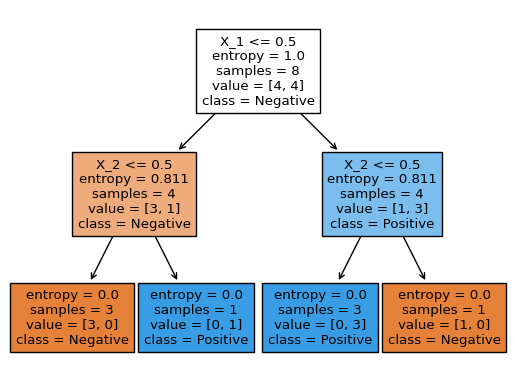

In [26]:
from sklearn.tree import plot_tree
plot_tree(clf, feature_names=list(X), class_names=['Negative', 'Positive'], filled=True); 

<b>Энтропия</b> - мера беспорядка. Чем выше энтропия, тем хуже получается разделить классы.

В бинарном классификации энтропия находится от 0 до 1.

0 - Когда классы можно однозначно разделить

1 - Когда полный хаус и нет представления как разделить классы

S0 -  полная энтропия (может обозначаться E(S)),

S1,S2 - условная энтропия, для конкретного условия разделения выборки

Формула расчета энтропии Шеннона для системы с N возможными состояниями:

\begin{align*}
E(S) = -\sum_{i=1}^{N} p_ilog_2p_i
\end{align*}

где $p_i$ – вероятности нахождения системы в $i$-ом состоянии


Для случая бинарной классификации

\begin{align*}
E(S) = -p *log_2(p) - (1 - p) * log_2(1 - p)
\end{align*}

где p - отношение количества элементов 1 класса к сумме всех элементов обоих классов

Поскольку энтропия это по сути степень хаоса (или неопределенности) в системе, то уменьшение энтропии называют приростом информации.

Формула прироста информации:
\begin{align*}
IG(Q) = S_o - \sum_{i=1}^{q} \frac{N_i}{N} S_i
\end{align*}